# CREDIT EDA CASE STUDY

## Business Objectives:

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [3]:
#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option("max_rows", None)
pd.set_option('display.max_columns', None)

In [6]:
#Load the two datasets i.e., application data and previous application into the dataframe

ad=pd.read_csv("application_data.csv")
pa=pd.read_csv("previous_application.csv")

In [7]:
#display first 10 records of the dataframe ad
ad.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
#display first 10 records of the dataframe pa
pa.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#display no of rows and columns of the dataframe ad
ad.shape

(307511, 122)

In [10]:
#display no of rows and columns of the dataframe pa
pa.shape

(1670214, 37)

In [11]:
#display data types of the column in dataframe ad
ad.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [12]:
#display data types of the column in dataframe pa
pa.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [13]:
#percentage of null values of each column in dataframe ad
round(100*(ad.isnull().sum()/len(ad.index)),3)

#drop all columns with null percentage more than 50% in current application data
ad=ad.dropna(thresh=ad.shape[0]*0.5,how='all',axis=1)

#verify column with null % more than 50 are deleted
round(100*(ad.isnull().sum()/len(ad.index)),3)

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
REGION_POPULATION_RELATIVE       0.000
DAYS_BIRTH                       0.000
DAYS_EMPLOYED                    0.000
DAYS_REGISTRATION                0.000
DAYS_ID_PUBLISH                  0.000
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_CONT_MOBILE                 0.000
FLAG_PHONE               

In [14]:
#Check categorical columns & Continuous Columns in dataframe ad
ad.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

In [15]:
#percentage of null values of each column in dataframe pa
round(100*(pa.isnull().sum()/len(pa.index)),3)

#drop all columns with null percentage more than 50% in previous application data
pa=pa.dropna(thresh=pa.shape[0]*0.5,how='all',axis=1)

#verify column with null % more than 50 are deleted
round(100*(pa.isnull().sum()/len(pa.index)),3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                49.120
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    22.286
NAME_YIELD_GROUP                0.000
PRODUCT_COMB

In [16]:
#Check categorical columns & Continuous Columns in dataframe pa
pa.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_STATUS                 4
NAME_YIELD_GROUP                     5
NAME_PORTFOLIO                       5
NAME_TYPE_SUITE                      7
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE                     2873
DAYS_FIRST_DUE                    2892
DAYS_DECISION            

In [17]:
#converting the negative values to positive values with the help of absolute function
ad['DAYS_BIRTH'] = ad['DAYS_BIRTH'].abs()
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#converting the negative values to positive values with the help of absolute function
ad['DAYS_EMPLOYED'] = ad['DAYS_EMPLOYED'].abs()
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Checking Distribution of Target Variable

In [19]:
# Assigning the target variables
defaulters=ad[ad.TARGET==1]
nondefaulters=ad[ad.TARGET==0]

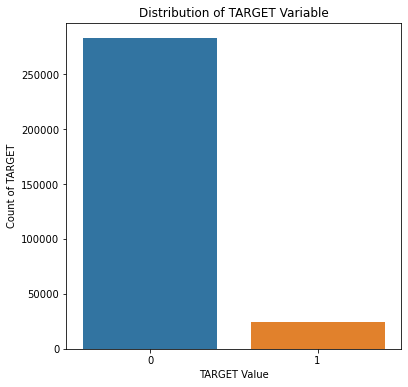

In [21]:
# Plotting the Distrubution of Target Variable

plt.figure(figsize = (6,6))
sns.countplot(ad.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

From this information, we see this is an imbalanced dataset. There are far more loans that were repaid on time than loans that were not repaid.

More than 25000 loans were repaid, Less than 5000 loans were not repaid.

In [22]:
# Finding out the percentage of defaulters to Nondefaulters

percentage_defaulters=(len(defaulters)*100)/len(ad)
percentage_nondefaulters=(len(nondefaulters)*100)/len(ad)

print("The Percentage of people who have paid their loan is:",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:",round(len(nondefaulters)/len(defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


### Identifying missing values in each column

In [23]:
# For the column 'CODE_GENDER', replace 'XNA' with null value (nan)

ad['CODE_GENDER']=ad['CODE_GENDER'].replace('XNA',np.nan)
ad['CODE_GENDER'].unique()

array(['M', 'F', nan], dtype=object)

##### here the nan values are very less as it may be due to various reasons, still we have kept as it is to have an overview of the data

In [24]:
# For the column 'ORGANIZATION_TYPE', replace 'XNA' with null  value (nan)

ad['ORGANIZATION_TYPE']=ad['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [25]:
#Days Employed which is days before the application the person started current employment has max value 365243.00 i,e approx 1000 yrs clearly this data is invalid

#no of records with invalid data
ad.DAYS_EMPLOYED[ad.DAYS_EMPLOYED== 365243 ].count()

#replace this invalid data with null
ad['DAYS_EMPLOYED']=ad['DAYS_EMPLOYED'].replace( 365243,np.NaN)

#verifying the records
ad.DAYS_EMPLOYED[ad.DAYS_EMPLOYED== 365243 ].count()

0

In [26]:
#Chceking the values for NAME_TYPE_SUITE as it contains different attributes

print(ad.NAME_TYPE_SUITE.value_counts(normalize=True))

#null values in column NAME_TYPE_SUITE can be replaced with mode  
print(ad['NAME_TYPE_SUITE'].describe())

#Replace null in NAME_TYPE_SUITE column with mode()[0] as unaccopanied is 81% among distribution.
ad.NAME_TYPE_SUITE.fillna(ad.NAME_TYPE_SUITE.mode()[0],inplace=True)
print(ad.NAME_TYPE_SUITE.isnull().sum())
ad.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64
count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object
0


Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [27]:
#no of rows with null in AMT_ANNUITY 
print(ad.AMT_ANNUITY.isnull().sum())
print(round(ad.AMT_ANNUITY.describe(),2))

12
count    307499.00
mean      27108.57
std       14493.74
min        1615.50
25%       16524.00
50%       24903.00
75%       34596.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64


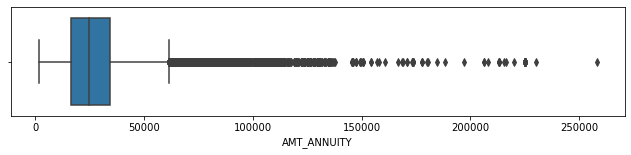

In [28]:
plt.figure(figsize =[11,2])
sns.boxplot(ad.AMT_ANNUITY)
plt.show()

In [29]:
#Clearly there are outliers in AMT_ANNUITY.NULL values in the columns can be replaced with median=24903.
ad.AMT_ANNUITY.fillna(24903,inplace=True)
ad.AMT_ANNUITY.isnull().sum()

0

In [30]:
print(round(ad.AMT_ANNUITY.describe(),2))

count    307511.00
mean      27108.49
std       14493.46
min        1615.50
25%       16524.00
50%       24903.00
75%       34596.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64


In [31]:
#no of rows with null in AMT_GOODS_PRICE
print(ad.AMT_GOODS_PRICE.isnull().sum())
print(round(ad.AMT_GOODS_PRICE.describe(),2))

278
count     307233.00
mean      538396.21
std       369446.46
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


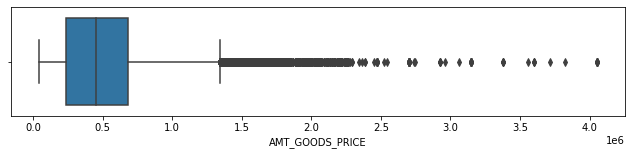

In [32]:
plt.figure(figsize =[11,2])
sns.boxplot(ad.AMT_GOODS_PRICE)
plt.show()

In [34]:
#Clearly there are outliers in AMT_GOODS_PRICE.NULL values in the columns can be replaced with median=450000.
ad.AMT_GOODS_PRICE.fillna(450000,inplace=True)
ad.AMT_GOODS_PRICE.isnull().sum()

0

In [35]:
print(round(ad.AMT_GOODS_PRICE.describe(),2))

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


### Treat Outliers

#### checking outliers for AMT_GOODS_PRICE 

In [36]:
ad.AMT_GOODS_PRICE.quantile([0.90,0.95,0.97,0.99])
# There is a huge difference between 97th and 99th percentile 

#for ad.AMT_GOODS_PRICE
seriesObj = ad.apply(lambda x: True if x['AMT_GOODS_PRICE'] > 1354500 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of Rows in dataframe in which AMT_GOODS_PRICE > 1354500.0 : ', numOfRows)

#percentage of outlier

8558/ad.shape[0]

#cap these outliers in AMT_GOODS_PRICE with values 1354500
ad.loc[(ad.AMT_GOODS_PRICE > 1354500),'AMT_GOODS_PRICE']=1354500

seriesObj = ad.apply(lambda x: True if x['AMT_GOODS_PRICE'] > 1354500 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of Rows in dataframe in which AMT_GOODS_PRICE > 1354500.0 : ', numOfRows)

Number of Rows in dataframe in which AMT_GOODS_PRICE > 1354500.0 :  8558
Number of Rows in dataframe in which AMT_GOODS_PRICE > 1354500.0 :  0


#### checking outliers for AMT_INCOME_TOTAL 

In [60]:
## FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

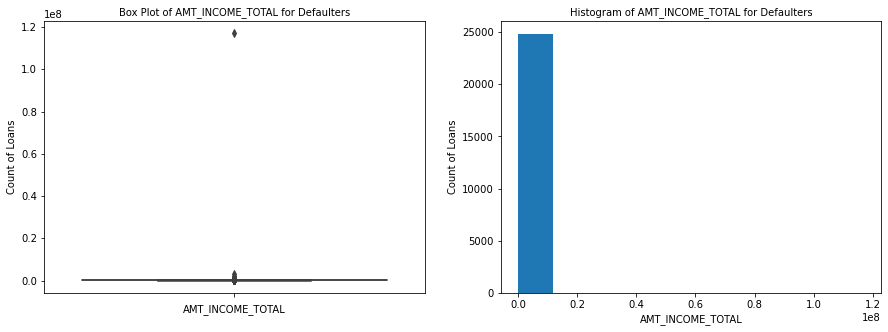

In [61]:
plot_boxhist('AMT_INCOME_TOTAL')

We can see that there are some outliers and the graph looks like this to accomodate those outliers.

In [39]:
ad.AMT_INCOME_TOTAL.describe().apply(lambda x: format(x, 'f'))

Number of Rows in dataframe in which AMT_INCOME_TOTAL > 500000.0 :  2702


In [40]:
ad.AMT_INCOME_TOTAL.quantile([0.25,0.50,0.75,0.90,0.97,0.99])

0.25    112500.0
0.50    147150.0
0.75    202500.0
0.90    270000.0
0.97    382500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
#There is a huge difference between 99th and 100th percentile

seriesObj = ad.apply(lambda x: True if x['AMT_INCOME_TOTAL'] > 500000.0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of Rows in dataframe in which AMT_INCOME_TOTAL > 500000.0 : ', numOfRows)

Number of Rows in dataframe in which AMT_INCOME_TOTAL > 500000.0 :  2702


In [42]:
#cap these outliers in AMT_INCOME_TOTAL with values 500000
ad.loc[(ad.AMT_INCOME_TOTAL > 500000),'AMT_INCOME_TOTAL']=500000.0

#### checking outliers for AMT_ANNUITY 

In [43]:
ad.AMT_ANNUITY.quantile([0.50,0.75,0.90,0.97,0.99])

seriesObj = ad.apply(lambda x: True if x['AMT_ANNUITY'] > 70000 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print('Number of Rows in dataframe in which AMT_ANNUITY > 70000.0 : ', numOfRows)

#cap these outliers in AMT_ANNUITY with values 70000
ad.loc[(ad.AMT_ANNUITY > 70000),'AMT_ANNUITY']=70000.0

Number of Rows in dataframe in which AMT_ANNUITY > 70000.0 :  3081


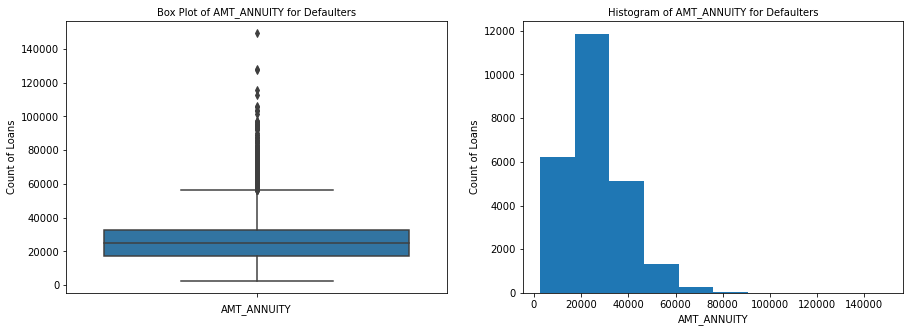

In [63]:
plot_boxhist('AMT_ANNUITY')

## Binning

In [45]:
# Binning on Income Category

#0.25    112500.0
#0.50    147150.0 Below this income is low
#0.75    202500.0 
#0.90    270000.0 Average
#0.97    382500.0 Above this Very High
#0.99    472500.0 

bins=[0,140000,270000,382500,500000]
group_names=['LOW','AVERAGE','HIGH','VERY HIGH']
ad['INCOME_CATEGORY']=pd.cut(ad.AMT_INCOME_TOTAL,bins,labels=group_names)

ad.INCOME_CATEGORY.head(10)



0    AVERAGE
1    AVERAGE
2        LOW
3        LOW
4        LOW
5        LOW
6    AVERAGE
7       HIGH
8        LOW
9        LOW
Name: INCOME_CATEGORY, dtype: category
Categories (4, object): [LOW < AVERAGE < HIGH < VERY HIGH]

In [49]:
ad.age_groups = ad.DAYS_BIRTH/365
ad.age_groups.describe()

#Binning on Age 

#count    307511.000000
#mean         43.936973
#min          20.517808
#25%          34.008219
#50%          43.150685
#75%          53.923288
#max          69.120548
bins=[0,20,45,55,60]
group_names=['VERY YOUNG','ADULT','MIDDLE-AGED','LOW']
ad['AGE_BIN']=pd.cut(ad.age_groups,bins,labels=group_names)

ad.AGE_BIN.head(10)

0          ADULT
1    MIDDLE-AGED
2    MIDDLE-AGED
3    MIDDLE-AGED
4    MIDDLE-AGED
5    MIDDLE-AGED
6          ADULT
7    MIDDLE-AGED
8            LOW
9          ADULT
Name: AGE_BIN, dtype: category
Categories (4, object): [VERY YOUNG < ADULT < MIDDLE-AGED < LOW]

#### Defining a Function to plot graphs

In [54]:
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data = defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data =nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    
plt.show()

### Univariate Analyis on Categorical Columns

In [53]:
# Getting a list of columns with dtype=object, to identify columns for categorical analysis

ad.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

We observe that the number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1

In [ ]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=Tru

We observe that the number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 1

In [ ]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

We observe that the number of most people applying for loan do not own a car

We also observe that the ratio of people who own a car is higher for non-defaulters

In [ ]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

Observation:

Most people live in a House/Apartment
Ratio of People who live With Parents is more for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.

In [ ]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

While the category with highest count remains same.

This chart tells us that people with Academic Degree rarely take loans and are rarely defaulters. So they are potentially good customers.
People with higher education are less likely to have payment difficulties. The Ratio is higher for non-defaulters than defaulters.

In [ ]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

Ratio of Single/Unmarried people is more in the left graph.

Single/Unmarried people are more likely to have payment difficulties

### univariate analysis on continuous Variable


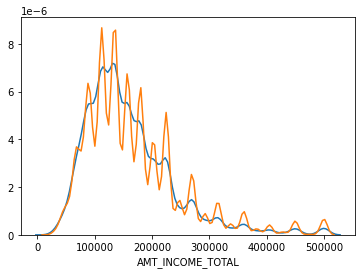

In [73]:
target = [1, 0]

for i in target:
    subset = ad[ad['TARGET']==i]
    sns.distplot(subset['AMT_INCOME_TOTAL'], hist = False)

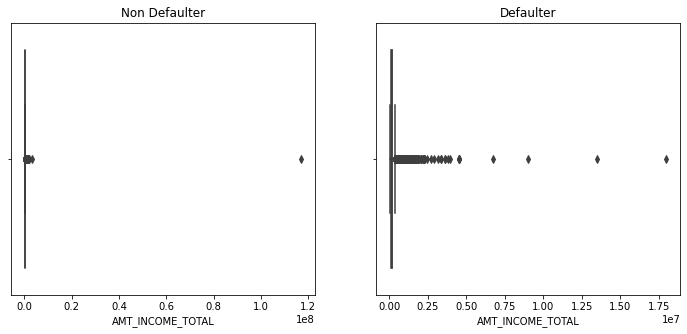

In [74]:
plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.boxplot(target0.AMT_INCOME_TOTAL)
plt.title("Non Defaulter")
plt.subplot(1,2,2)
sns.boxplot(target1.AMT_INCOME_TOTAL)
plt.title("Defaulter")
plt.show()

#Median in target1 is less than target0 but lower ,upper ,25th and 75th quartile are same.

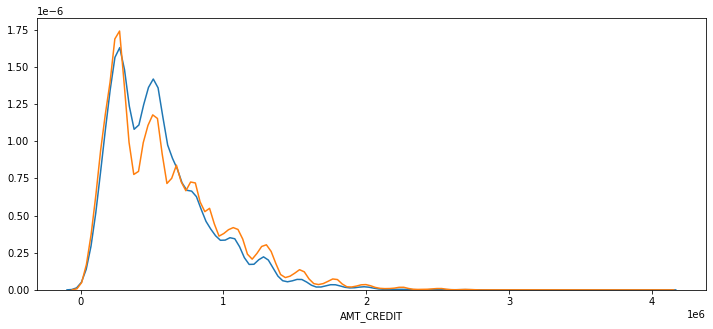

In [75]:
target = [1, 0]
plt.figure(figsize=(12,5))

for i in target:
    subset = ad[ad['TARGET']==i]
    sns.distplot(subset['AMT_CREDIT'], hist = False)

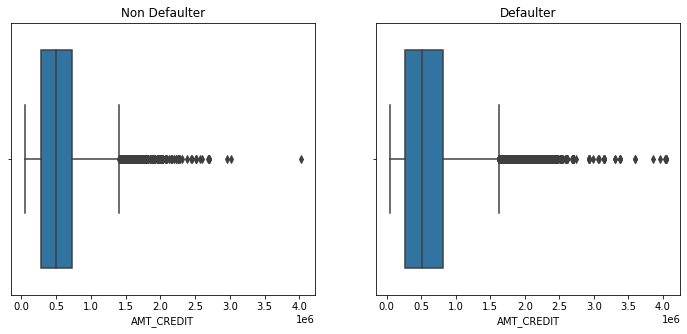

In [78]:
plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.boxplot(target0.AMT_CREDIT)
plt.title("Non Defaulter")
plt.subplot(1,2,2)
sns.boxplot(target1.AMT_CREDIT)
plt.title("Defaulter")
plt.show()

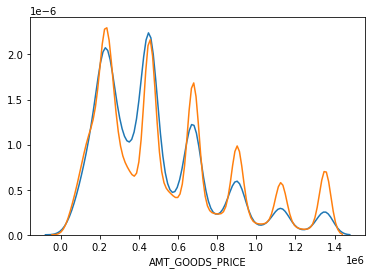

In [76]:
target = [1, 0]

for i in target:
    subset = ad[ad['TARGET']==i]
    sns.distplot(subset['AMT_GOODS_PRICE'], hist = False)

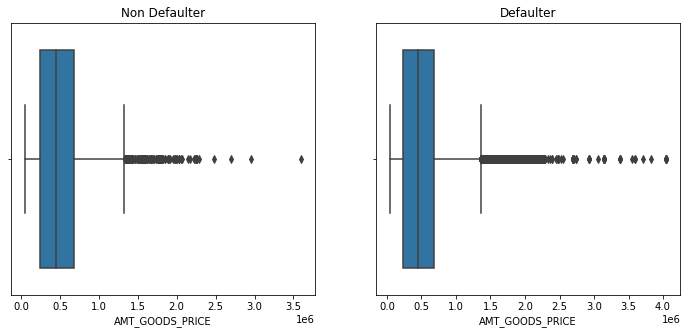

In [77]:
plt.figure(figsize=(12,5)) 
plt.subplot(1,2,1)
sns.boxplot(target0.AMT_GOODS_PRICE)
plt.title("Non Defaulter")
plt.subplot(1,2,2)
sns.boxplot(target1.AMT_GOODS_PRICE)
plt.title("Defaulter")
plt.show()

## Correlation model

In [64]:
#continuous -continuous

matrix0=defaulters[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_CHILDREN','CNT_FAM_MEMBERS']].corr()
matrix1=nondefaulters[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_CHILDREN','CNT_FAM_MEMBERS']].corr()


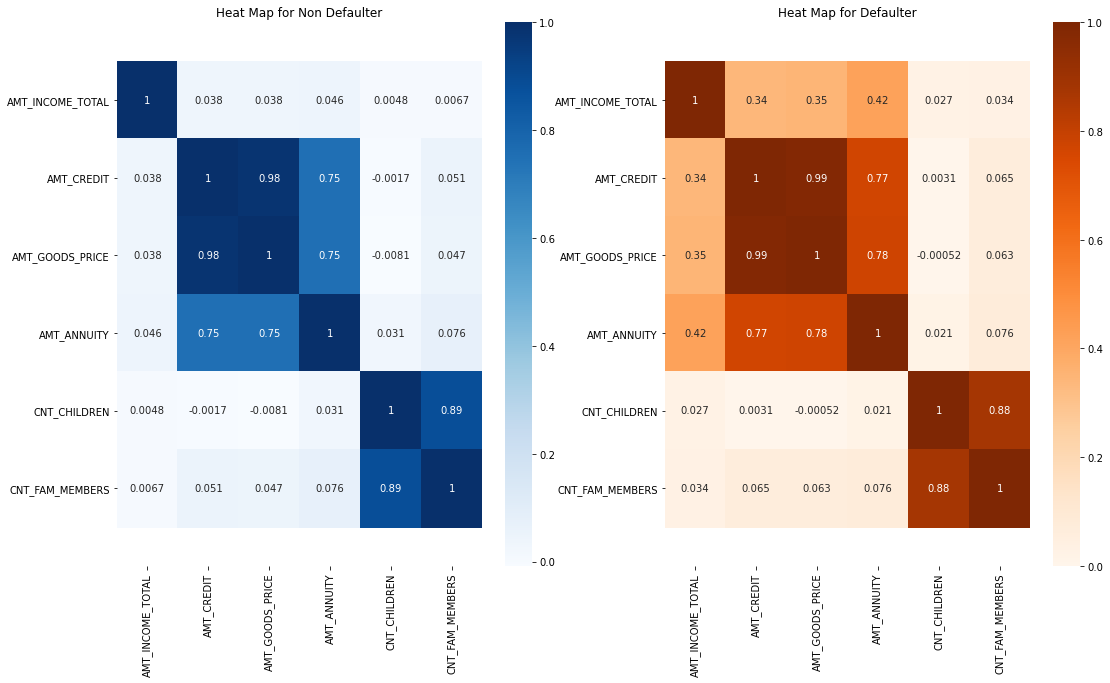

In [65]:

plt.figure(figsize=(18,10)) 
plt.subplot(1,2,1)
plt.title("Heat Map for Non Defaulter")
ax=sns.heatmap(matrix0,annot=True, cmap = "Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

plt.subplot(1,2,2)
ax=sns.heatmap(matrix1,annot=True, cmap = 'Oranges')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title("Heat Map for Defaulter")
plt.show()

In [66]:
corr0 = matrix0.where(np.triu(np.ones(matrix0.shape), k=1).astype(np.bool))
corr_df0 = corr0.unstack().reset_index()
corr_df0.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_df0 = corr_df0.dropna(subset = ['Correlation'])
corr_df0.Correlation = abs(corr_df0.Correlation)
corr_df0.sort_values("Correlation", ascending=False)

#Upper triangle of Heat map -> High Correlation to Low Correlation
#Target 0

,VAR1,VAR2,Correlation
13,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
34,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
20,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699
19,AMT_ANNUITY,AMT_CREDIT,0.752195
33,CNT_FAM_MEMBERS,AMT_ANNUITY,0.075711
31,CNT_FAM_MEMBERS,AMT_CREDIT,0.051224
32,CNT_FAM_MEMBERS,AMT_GOODS_PRICE,0.047388
18,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
12,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037583


In [67]:
corr1 = matrix1.where(np.triu(np.ones(matrix1.shape), k=1).astype(np.bool))
corr_df1 = corr1.unstack().reset_index()
corr_df1.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_df1 = corr_df1.dropna(subset = ['Correlation'])
corr_df1.Correlation = abs(corr_df1.Correlation)
corr_df1.sort_values("Correlation", ascending=False)

#Upper triangle of Heat map -> High Correlation to Low Correlation
#Target 1

,VAR1,VAR2,Correlation
13,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
34,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
20,AMT_ANNUITY,AMT_GOODS_PRICE,0.776686
19,AMT_ANNUITY,AMT_CREDIT,0.771309
18,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
12,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
33,CNT_FAM_MEMBERS,AMT_ANNUITY,0.075787
31,CNT_FAM_MEMBERS,AMT_CREDIT,0.064536
32,CNT_FAM_MEMBERS,AMT_GOODS_PRICE,0.062814


1. top 10 correlation in both set are same.
2. AMT_GOODS_PRICE is highly corelated to AMT_CREDIT i.e higher the price of good for which loan has been 
3. taken ,higher is  loan credited.Higher the price of good  and load credited, higher will the annual annuity
4. Hence AMT_GOODS_PRICE,AMT_CREDIT and AMT_ANNUITY are highly correlated among themselves.
5. Num of children and no of family members does not have any impact on AMT_GOOD_PRICE,AMT_CREDIT,AMT_ANNUITY.Hence dont have any correlation 

In [70]:
target0 = defaulters
target1 = nondefaulters

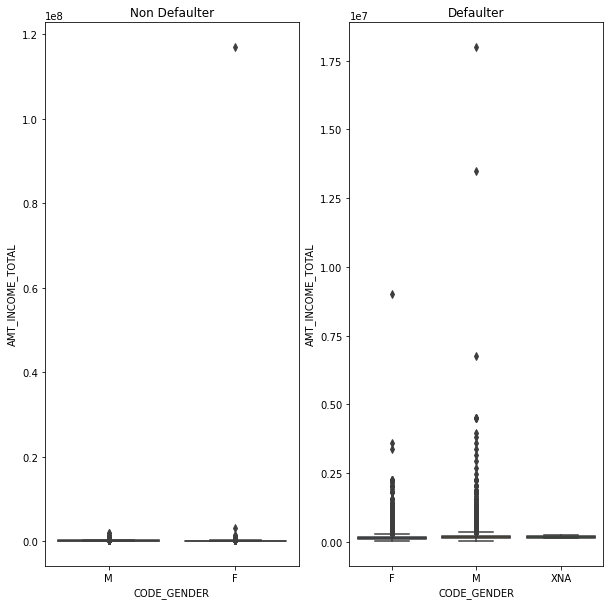

In [83]:
#CAT-conti
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title("Non Defaulter")
sns.boxplot(x = 'CODE_GENDER', y =  'AMT_INCOME_TOTAL', data = target0)
plt.subplot(1, 2, 2)
plt.title("Defaulter")
sns.boxplot(x = 'CODE_GENDER', y =  'AMT_INCOME_TOTAL', data = target1)
plt.show()

MEN's INCOME in target1 set are more dense in lower income.For female target1 and target0 boxplot are almost equal.

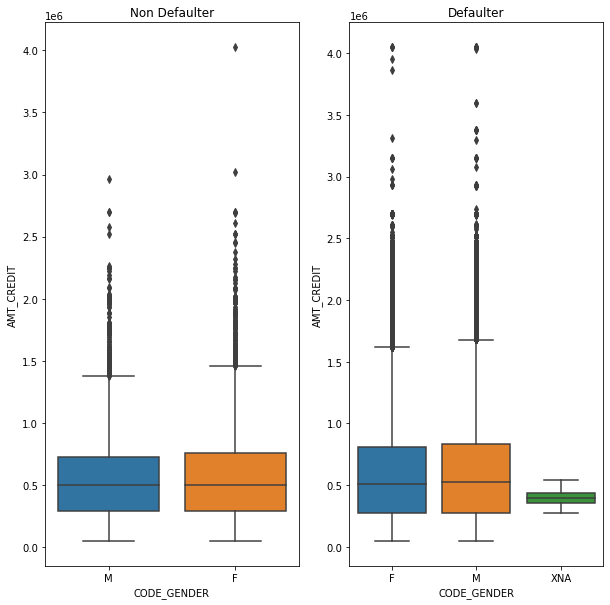

In [82]:
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title("Non Defaulter")
sns.boxplot(x = 'CODE_GENDER', y =  'AMT_CREDIT', data = target0)
plt.subplot(1, 2, 2)
plt.title("Defaulter")
sns.boxplot(x = 'CODE_GENDER', y =  'AMT_CREDIT', data = target1)
plt.show()

Loan credited are more wide in target0 set than target1 set.There are more discontinued Outlier in target0 for larger creditted amount

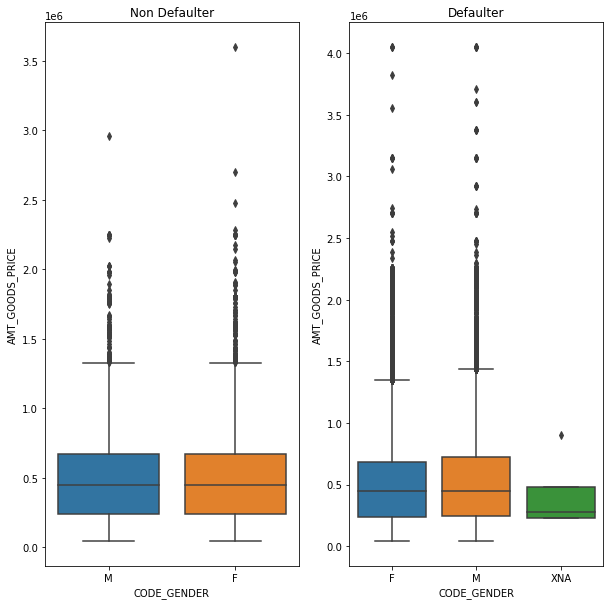

In [84]:
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title("Non Defaulter")
sns.boxplot(x = 'CODE_GENDER', y =  'AMT_GOODS_PRICE', data = target0)
plt.subplot(1, 2, 2)
plt.title("Defaulter")
sns.boxplot(x = 'CODE_GENDER', y =  'AMT_GOODS_PRICE', data = target1)
plt.show()

box plot is more wide for defaulter men tahn women.
box plot is same for both non defaulter men and women.

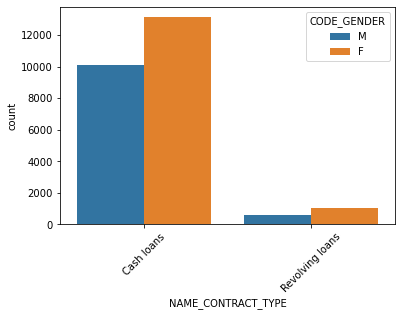

In [86]:
#cat-cat
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data = target0)
plt.xticks(rotation = 45)
plt.show()

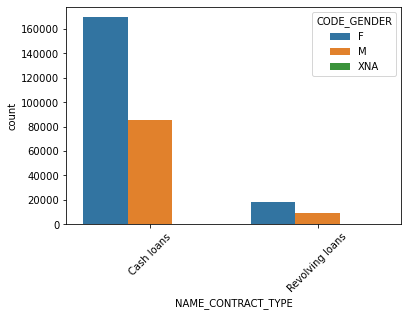

In [87]:
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data = target1)
plt.xticks(rotation = 45)
plt.show()

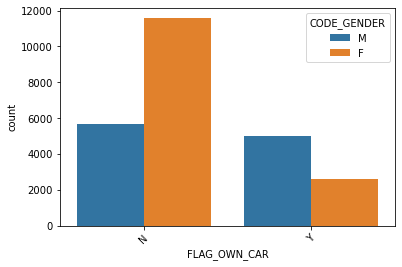

In [88]:
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'CODE_GENDER', data = target0)
plt.xticks(rotation = 45)
plt.show()

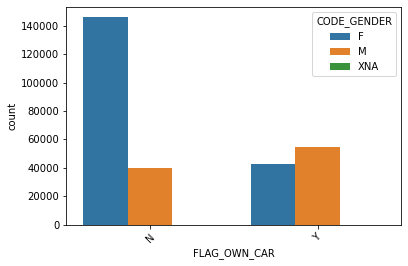

In [89]:
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'CODE_GENDER', data = target1)
plt.xticks(rotation = 45)
plt.show()

## Merge of 2 data sets

In [ ]:
#We wanted to analyze current scenario defaulters previous data>hence we will do inner join
JOIN= ad.merge(pa, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
JOIN.head()

In [ ]:
round(JOIN.describe(),2)

In [ ]:
join_target0=JOIN[(JOIN.TARGET==0) & (JOIN.NAME_CONTRACT_STATUS == 'Canceled')]
join_target0.head(10)